<a href="https://colab.research.google.com/github/maiaufrrj/BRtrading/blob/main/All_Assets_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## referências
Trading com Dados <br>
https://julian-west.github.io/blog/visualising-asset-price-correlations/

In [ ]:
!pip install yfinance

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
lista_ibov = pd.read_csv('https://raw.githubusercontent.com/maiaufrrj/BRtrading/main/lista_ibov.csv')['lista_ibov']

In [8]:
lista_acoes=[]
for i in range(len(lista_ibov)):
  lista_acoes.append(lista_ibov[i]+'.SA')
lista_ibov = list(lista_acoes)
del lista_acoes

In [ ]:
df = pd.DataFrame()
for acao in lista_ibov:
  df[acao] = yf.download(acao, start='2021-01-01', end='2021-10-11')['Adj Close']

In [11]:
df.head()

,ALPA4.SA,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BIDI4.SA,BIDI11.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BBAS3.SA,BRKM5.SA,BRFS3.SA,BPAC11.SA,CRFB3.SA,CCRO3.SA,CMIG4.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CSAN3.SA,CPFE3.SA,CVCB3.SA,CYRE3.SA,DXCO3.SA,ECOR3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENGI11.SA,ENEV3.SA,EGIE3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,...,ITUB4.SA,JBSS3.SA,JHSF3.SA,KLBN11.SA,RENT3.SA,LCAM3.SA,LWSA3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,CASH3.SA,BEEF3.SA,MRVE3.SA,MULT3.SA,PCAR3.SA,PETR3.SA,PETR4.SA,BRDT3.SA,PRIO3.SA,PETZ3.SA,QUAL3.SA,RADL3.SA,RDOR3.SA,RAIL3.SA,SBSP3.SA,SANB11.SA,CSNA3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,41.650002,15.406572,75.180000,NaN,37.730000,19.512051,10.729084,32.410583,9.356296,28.207680,9.53,20.770641,23.307987,55.270172,35.563656,23.350000,21.480000,22.975832,18.447718,13.177582,12.121451,3.832373,4.70,6.183403,19.581043,28.360451,20.170000,27.284336,18.416721,13.25,33.112141,33.466846,8.37,18.571939,49.227791,15.6325,40.577354,22.095846,40.632851,26.092205,...,30.256287,21.941372,6.992441,26.049999,67.419151,28.650425,20.160000,25.227955,41.815525,25.181740,13.279325,2.840149,9.395557,18.251841,22.549999,9.397452,26.965372,26.396517,20.116247,14.960,18.565802,31.950882,24.972378,64.714264,19.150000,42.164333,42.261494,32.801929,40.141628,58.910000,30.668737,43.783310,14.196632,27.612566,23.556740,13.970072,77.746445,16.170000,36.920170,33.465923
2021-01-05,41.669998,15.735008,73.500000,NaN,38.200001,19.550451,10.472599,31.524536,9.316311,27.679804,9.72,20.671333,23.165882,56.350643,35.194675,23.360001,21.309999,22.803045,18.322485,12.959113,12.121451,3.743934,4.67,6.090211,19.642822,28.225487,20.230000,26.757797,18.162697,13.02,32.257153,32.505363,8.57,18.390203,48.968189,15.7425,40.214222,22.144407,39.658440,25.667000,...,30.060455,22.260042,6.917253,25.870001,67.021278,28.166166,20.662500,24.930000,41.409359,24.742058,13.195748,2.915066,9.208395,18.144651,22.580000,9.178441,27.788044,27.428276,20.346413,14.758,18.575794,31.348211,24.902536,63.958778,19.299999,42.065262,41.634274,33.397110,40.010109,58.639999,30.724501,43.411617,13.871969,27.483253,23.361410,14.119684,79.055534,16.219999,39.186237,33.633251
2021-01-06,39.400002,16.053490,68.699997,NaN,36.669998,19.230476,10.366008,31.397959,9.296319,27.228714,9.21,21.190981,23.933664,59.010262,35.998859,24.270000,21.250000,22.067463,18.255053,12.581759,12.370053,3.655495,4.53,6.097767,19.595871,28.216488,20.379999,26.068508,18.035685,12.49,31.736729,32.320465,8.90,18.351688,48.247078,14.9350,39.888340,21.668497,38.050667,25.125830,...,30.941704,22.063217,6.644699,26.360001,63.161942,27.217411,20.150000,23.469999,39.328987,23.442999,12.796440,2.703635,9.077381,17.608692,21.620001,9.103352,28.107973,27.483057,20.051804,14.590,17.626518,30.226313,24.323872,61.306114,19.180000,41.857212,43.059776,34.808250,39.164627,57.570000,30.780258,42.925564,13.488277,26.180212,23.078182,14.802291,81.648216,15.490000,40.225273,32.294621
2021-01-07,38.700001,15.973868,67.309998,NaN,36.049999,19.768032,11.105486,32.786987,9.376287,27.804573,9.14,21.710625,24.569069,63.481739,37.427452,24.870001,21.930000,22.207314,18.120186,12.542038,12.232895,3.684974,4.62,5.939090,20.359442,27.217754,19.559999,26.231256,18.758677,12.60,31.513689,31.710295,8.88,17.870270,45.824150,14.9250,39.553143,21.202301,37.339344,25.227953,...,32.146076,22.335022,6.597706,27.760000,66.155914,27.454599,19.677500,23.180000,40.369167,23.143217,12.852159,2.706966,9.030590,17.491756,21.600000,9.264793,28.930643,28.304810,20.420063,14.806,17.506611,29.809080,24.014587,59.881535,19.629999,41.827496,43.648983,36.987366,38.709724,62.490002,29.878786,41.839085,13.271834,26.110584,23.781368,15.512950,86.978088,15.080000,41.887722,32.698177
2021-01-08,40.700001,16.451593,72.000000,NaN,36.599998,20.059210,13.37

In [16]:
#calculate correlation matrix using inbuilt pandas function
correlation_matrix = df.corr()

#show first five rows of the correlation matrix 
correlation_matrix.head()

,ALPA4.SA,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BIDI4.SA,BIDI11.SA,BPAN4.SA,BBSE3.SA,BRML3.SA,BBDC3.SA,BBDC4.SA,BRAP4.SA,BBAS3.SA,BRKM5.SA,BRFS3.SA,BPAC11.SA,CRFB3.SA,CCRO3.SA,CMIG4.SA,CIEL3.SA,COGN3.SA,CPLE6.SA,CSAN3.SA,CPFE3.SA,CVCB3.SA,CYRE3.SA,DXCO3.SA,ECOR3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENGI11.SA,ENEV3.SA,EGIE3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,...,ITUB4.SA,JBSS3.SA,JHSF3.SA,KLBN11.SA,RENT3.SA,LCAM3.SA,LWSA3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,CASH3.SA,BEEF3.SA,MRVE3.SA,MULT3.SA,PCAR3.SA,PETR3.SA,PETR4.SA,BRDT3.SA,PRIO3.SA,PETZ3.SA,QUAL3.SA,RADL3.SA,RDOR3.SA,RAIL3.SA,SBSP3.SA,SANB11.SA,CSNA3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,VIVT3.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
ALPA4.SA,1.000000,0.537094,-0.700108,0.811339,-0.142012,-0.760848,0.529841,0.555310,0.642717,-0.699913,0.055935,-0.028788,0.111300,0.260623,0.052935,0.786724,0.319103,0.667283,-0.220535,0.180192,0.623871,-0.525632,-0.514994,0.559107,0.526489,-0.442340,0.397335,-0.667724,0.696593,-0.490125,0.640125,0.647410,0.780027,-0.364976,-0.110795,0.011785,-0.425615,0.715217,-0.615547,-0.574403,...,0.512553,0.603412,0.208323,-0.821332,-0.259856,0.234490,-0.259091,-0.853290,-0.107255,-0.573360,0.640520,0.743306,-0.189395,-0.750717,-0.035660,0.369323,0.703673,0.680037,0.840937,0.319608,0.842486,-0.714473,0.348049,0.483090,-0.330913,-0.707637,0.212281,0.143002,-0.553713,-0.807887,0.675533,-0.316846,-0.605251,0.870692,-0.724641,0.260758,0.299447,-0.300780,-0.261388,-0.315404
ABEV3.SA,0.537094,1.000000,-0.152563,0.377926,0.503393,-0.235031,0.538335,0.540867,0.776201,-0.171363,0.734922,0.751589,0.823909,0.526804,0.571825,0.549709,0.596497,0.733349,0.435888,0.791135,0.540961,0.256840,0.251705,0.123122,0.582483,-0.149752,0.750526,-0.005100,0.649531,0.295178,0.834160,0.826747,0.451416,0.078484,0.341064,0.369534,-0.162803,0.606521,0.004624,0.133830,...,0.813925,0.171072,0.716428,-0.455542,0.238272,0.554162,-0.135886,-0.203899,0.657869,-0.196204,0.212593,0.497890,0.050763,-0.077636,0.654499,0.602679,0.537572,0.554291,0.776072,0.135792,0.383375,-0.074539,0.696934,0.285469,0.284565,-0.192696,0.726358,0.523281,0.042299,-0.511738,0.699769,0.116271,-0.345139,0.519551,-0.113993,0.364145,0.643658,0.331569,-0.521995,0.400256
AMER3.SA,-0.700108,-0.152563,1.000000,-0.669566,0.508176,0.902396,-0.248651,-0.269369,-0.320790,0.895918,0.270970,0.322448,0.213273,0.051842,0.336151,-0.737454,-0.260749,-0.227904,0.279273,0.152426,-0.496224,0.792224,0.846232,-0.773389,-0.403960,0.390306,-0.100763,0.893557,-0.430533,0.794883,-0.411098,-0.433042,-0.824598,0.260096,0.483859,0.360836,0.559993,-0.609760,0.873981,0.811543,...,-0.075595,-0.860064,0.256070,0.752012,0.694451,0.296682,0.605309,0.865321,0.429610,0.883991,-0.867391,-0.373412,-0.121803,0.888984,0.198004,-0.389071,-0.338178,-0.330526,-0.487494,-0.630234,-0.547549,0.867641,-0.008757,-0.187152,0.594449,0.511754,0.208075,0.044478,0.835866,0.561627,-0.594456,0.318742,0.646341,-0.552859,0.866945,-0.288439,-0.061220,0.788472,0.311896,0.762674
ASAI3.SA,0.811339,0.377926,-0.669566,1.000000,-0.083033,-0.745355,0.301429,0.319887,0.544631,-0.666651,-0.046053,-0.159107,-0.045880,0.110585,0.293345,0.838972,0.198403,0.557307,-0.253850,0.143138,0.834818,-0.474636,-0.454510,0.610034,0.323248,-0.145548,0.431684,-0.551773,0.800812,-0.344118,0.587096,0.606862,0.843609,-0.181731,0.243278,0.042940,-0.075161,0.792194,-0.540955,-0.431944,...,0.330976,0.743353,0.091272,-0.853723,-0.051328,0.381171,-0.204926,-0.713599,-0.196497,-0.690152,0.801823,0.529331,0.084738,-0.623025,-0.228803,0.139229,0.798883,0.806614,0.703758,0.467446,0.717471,-0.695748,0.249555,0.592758,-0.336258,-0.427509,0.072993,-0.062758,-0.522836,-0.867535,0.599425,-0.163382,-0.586972,0.773430,-0.601138,0.037094,-0.001401,-0.306987,0.134765,-0.131999
AZUL4.SA,-0.142012,0.503393,0.508176,-0.083033,1.000000,0.313140,0.280819,0.260039,0.451233,0.384705,0.672690,0.668107,0.672287,0.196945,0.475785,-0.016697,0.520815,0.465601,0.517402,0.597124,0.061061,0.658854,0

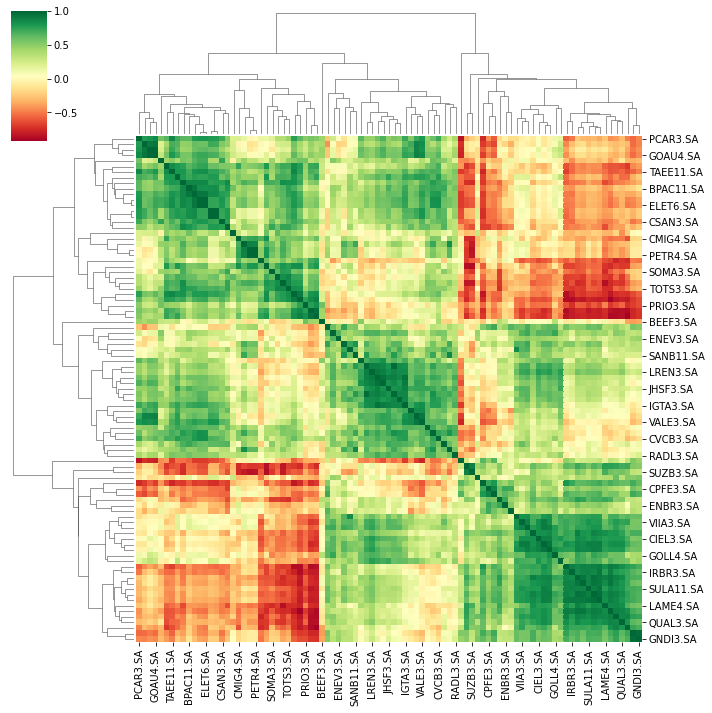

In [17]:
#visualise correlation matrix using a clustered heatmap
#display(HTML("<h3>Clustered Heatmap: Correlations between asset price returns</h3>"))
sns.clustermap(correlation_matrix, cmap="RdYlGn")
plt.show()

In [ ]:
correlation_matrix['CMIN']

# Visualização de Redes
Networkx é uma biblioteca popular para visualizar redes de pequenas ou médias. 

In [ ]:
#create undirected graph with weights corresponding to the correlation magnitude
G0 = nx.from_pandas_edgelist(edges, 'asset_1', 'asset_2', edge_attr=['correlation'])

#print out the graph info
#check number of nodes and degrees are as expected (all should have degree = 38, i.e. average degree = 38)
print(nx.info(G0))